In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sales_data=pd.read_csv("C:\ML\DATA\SALES.CSV")

In [5]:
sales_data.head()

,Customer ID,Product code,Weight,Fat level,% of space allocation,Product,Price of product,Store ID,Store Establishment Year,Store size,Store Tier Type,Store Type,Sale of product
0,EAT4532,FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,EAT4533,DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,EAT4534,FDN15,17.50,Low Fat,1.676008,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,EAT4535,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732
4,EAT4536,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,995


In [6]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value
        in column.
        Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
sales_df = pd.DataFrame(sales_data)
sales_clean_df = DataFrameImputer().fit_transform(sales_df)

In [7]:
sales_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Customer ID                 8523 non-null object
Product code                8523 non-null object
Weight                      8523 non-null float64
Fat level                   8523 non-null object
% of space allocation       8523 non-null float64
Product                     8523 non-null object
Price of product            8523 non-null float64
Store ID                    8523 non-null object
Store Establishment Year    8523 non-null int64
Store size                  8523 non-null object
Store Tier Type             8523 non-null object
Store Type                  8523 non-null object
Sale of product             8523 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 865.7+ KB


In [8]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    return df

In [9]:
numerical_features = ['Weight','% of space allocation','Price of product','Sale of product']

In [10]:
categorical_features = ['Fat level', 'Product','Store ID','Store size','Store Tier Type','Store Establishment Year','Store Type']

In [11]:
sales_all_features = numerical_features + categorical_features

In [18]:
sales_final=sales_clean_df[sales_all_features]

In [19]:
sales_final_df=pd.DataFrame(sales_final)

In [20]:
cleanup_nums = {"Fat level":     {"Low Fat": 0, "Regular": 1,"low fat":0,"LF":0,"reg":1,"0":2}}

In [21]:
sales_final_df.replace(cleanup_nums,inplace=True)

In [22]:
for c_feature in categorical_features:
  sales_final_df = create_dummies( sales_final_df, c_feature )

In [17]:
sales_final_df['Price of product'] = np.log1p( sales_final_df["Price of product"] )


In [79]:
sales_final_df['Weight'] = np.log1p( sales_final_df.Weight )

In [23]:
sales_final_df.head()

,Weight,% of space allocation,Price of product,Sale of product,Fat level,Product,Store ID,Store size,Store Tier Type,Store Establishment Year,...,Store Establishment Year_1997,Store Establishment Year_1998,Store Establishment Year_1999,Store Establishment Year_2002,Store Establishment Year_2004,Store Establishment Year_2007,Store Establishment Year_2009,Store Type_Supermarket Type1,Store Type_Supermarket Type2,Store Type_Supermarket Type3
0,9.30,1.604730,249.8092,3735,0,Dairy,OUT049,Medium,Tier 1,1999,...,0,0,1,0,0,0,0,1,0,0
1,5.92,1.927822,48.2692,443,1,Soft Drinks,OUT018,Medium,Tier 3,2009,...,0,0,0,0,0,0,1,0,1,0
2,17.50,1.676008,141.6180,2097,0,Meat,OUT049,Medium,Tier 1,1999,...,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732,1,Fruits and Vegetables,OUT010,Medium,Tier 3,1998,...,0,1,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,995,0,Household,OUT013,High,Tier 3,1987,...,0,0,0,0,0,0,0,1,0,0


In [20]:

sales_final_df['Sale of product'] = np.log1p( sales_final_df["Sale of product"] )

In [24]:
sales_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 52 columns):
Weight                           8523 non-null float64
% of space allocation            8523 non-null float64
Price of product                 8523 non-null float64
Sale of product                  8523 non-null int64
Fat level                        8523 non-null int64
Product                          8523 non-null object
Store ID                         8523 non-null object
Store size                       8523 non-null object
Store Tier Type                  8523 non-null object
Store Establishment Year         8523 non-null int64
Store Type                       8523 non-null object
Fat level_1                      8523 non-null uint8
Fat level_2                      8523 non-null uint8
Product_Breads                   8523 non-null uint8
Product_Breakfast                8523 non-null uint8
Product_Canned                   8523 non-null uint8
Product_Dairy                    8

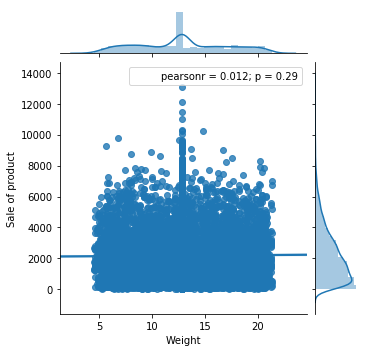

In [25]:
sns.jointplot(x="Weight", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [23]:
#Not significant

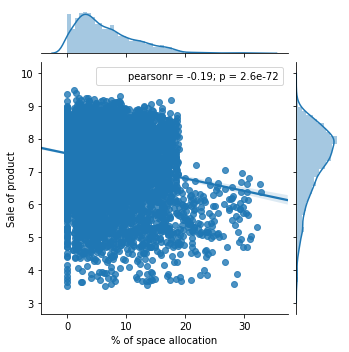

In [24]:
sns.jointplot(x="% of space allocation", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [25]:
#Significant

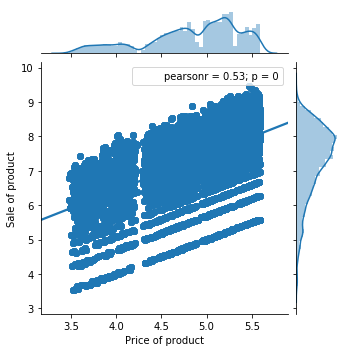

In [26]:
sns.jointplot(x="Price of product", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [27]:
#Significant

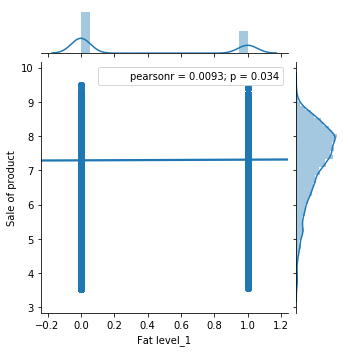

In [28]:
sns.jointplot(x="Fat level_1", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [29]:
#Not Significant

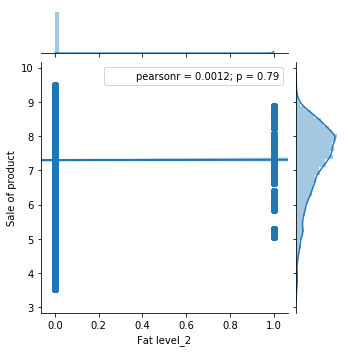

In [30]:
sns.jointplot(x="Fat level_2", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)

In [31]:
#Not Significant

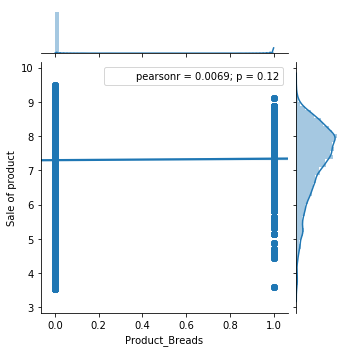

In [32]:
sns.jointplot(x="Product_Breads", y="Sale of product", data=sales_final_df, kind = ' ', size = 5) #Not Significant

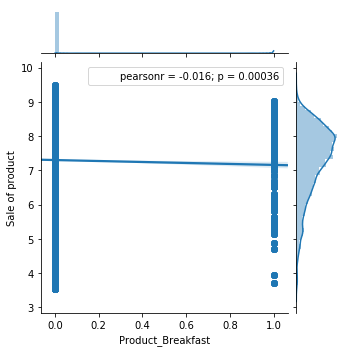

In [33]:
sns.jointplot(x="Product_Breakfast", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

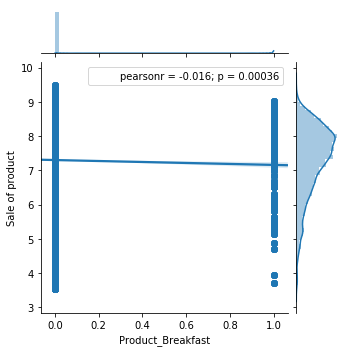

In [34]:
sns.jointplot(x="Product_Breakfast", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

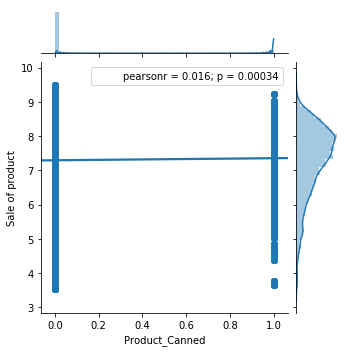

In [35]:
sns.jointplot(x="Product_Canned", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

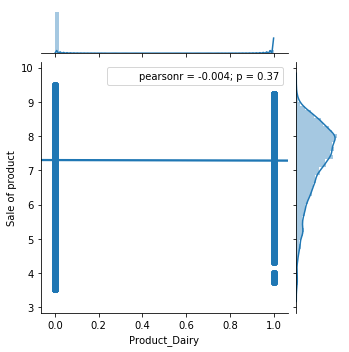

In [36]:
sns.jointplot(x="Product_Dairy", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

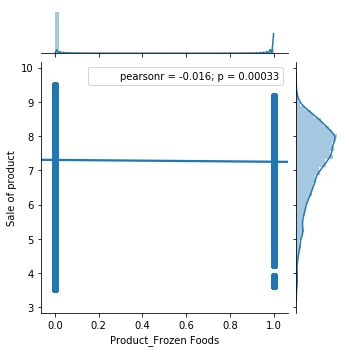

In [37]:
sns.jointplot(x="Product_Frozen Foods", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

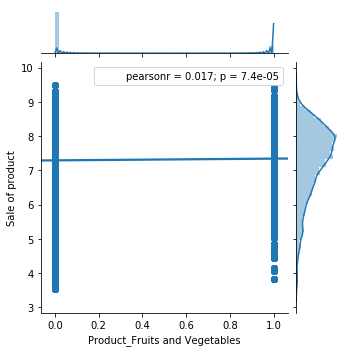

In [38]:
sns.jointplot(x="Product_Fruits and Vegetables", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

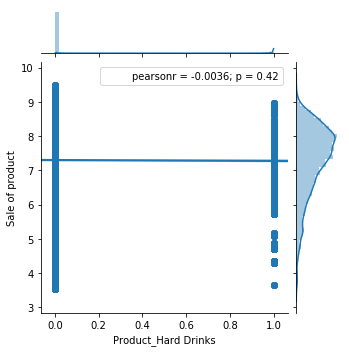

In [39]:
sns.jointplot(x="Product_Hard Drinks", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

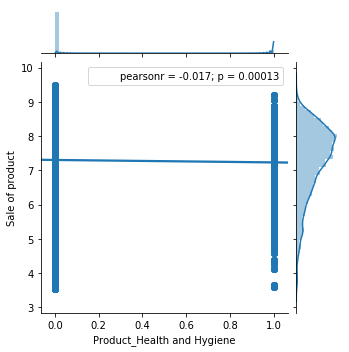

In [40]:
sns.jointplot(x="Product_Health and Hygiene", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

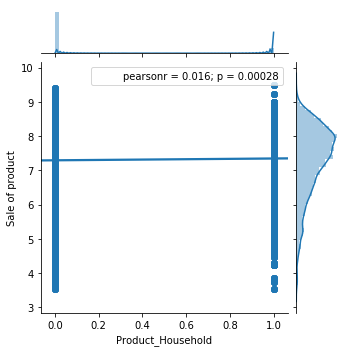

In [41]:
sns.jointplot(x="Product_Household", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

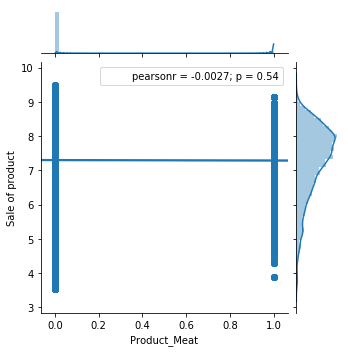

In [42]:
sns.jointplot(x="Product_Meat", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

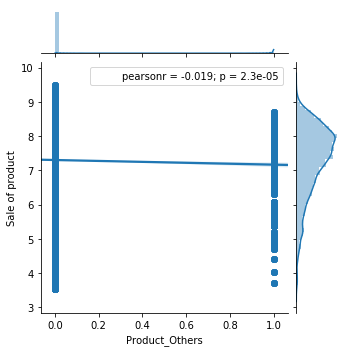

In [43]:
sns.jointplot(x="Product_Others", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) # Significant

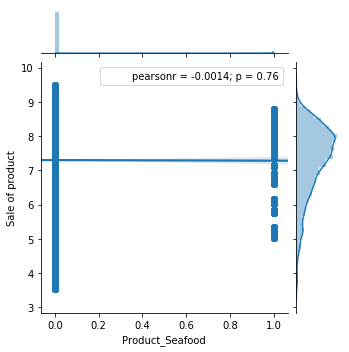

In [44]:
sns.jointplot(x="Product_Seafood", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

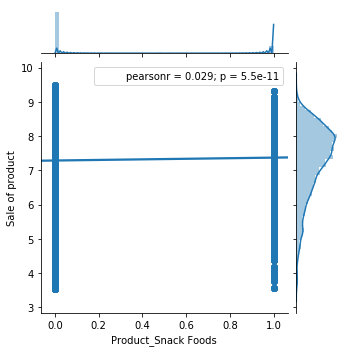

In [45]:
sns.jointplot(x="Product_Snack Foods", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) # Significant

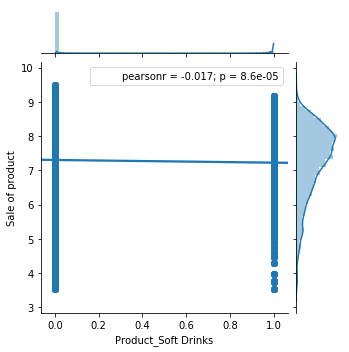

In [46]:
sns.jointplot(x="Product_Soft Drinks", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

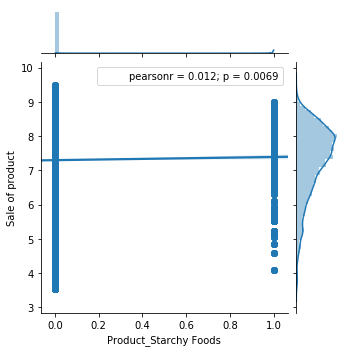

In [47]:
sns.jointplot(x="Product_Starchy Foods", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

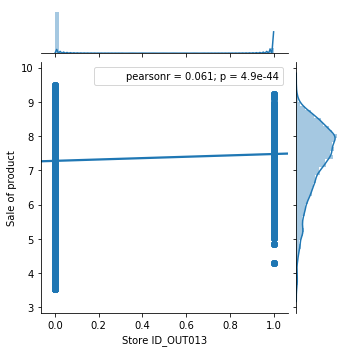

In [48]:
sns.jointplot(x="Store ID_OUT013", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

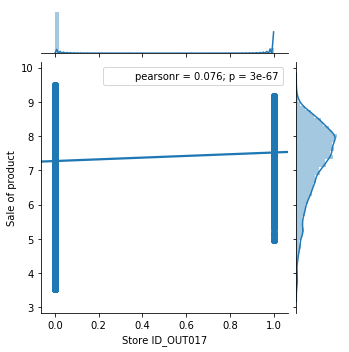

In [49]:
sns.jointplot(x="Store ID_OUT017", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

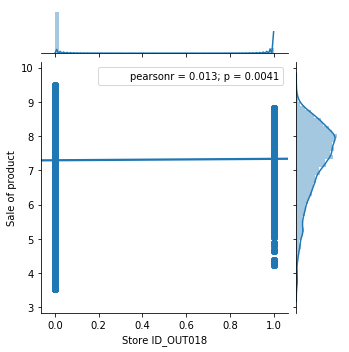

In [50]:
sns.jointplot(x="Store ID_OUT018", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

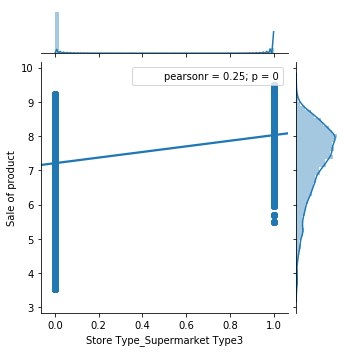

In [51]:
sns.jointplot(x="Store Type_Supermarket Type3", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

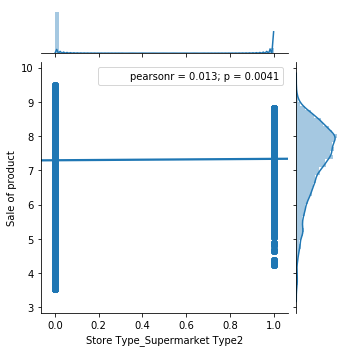

In [52]:
sns.jointplot(x="Store Type_Supermarket Type2", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

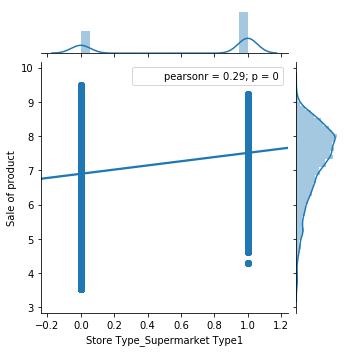

In [53]:
 sns.jointplot(x="Store Type_Supermarket Type1", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)# Significant

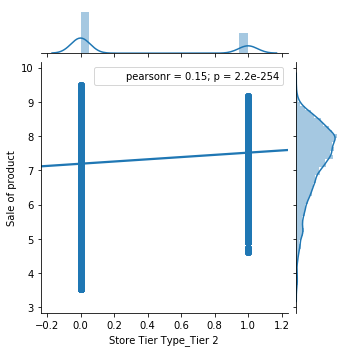

In [54]:
sns.jointplot(x="Store Tier Type_Tier 2", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

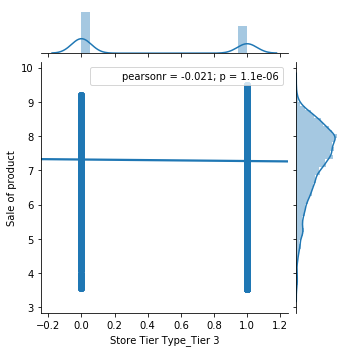

In [55]:
sns.jointplot(x="Store Tier Type_Tier 3", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

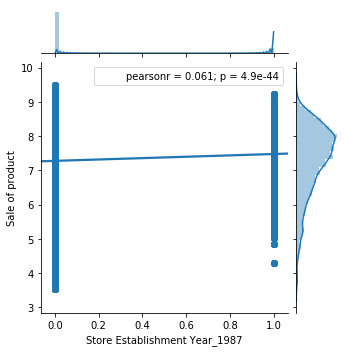

In [56]:
sns.jointplot(x="Store Establishment Year_1987", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

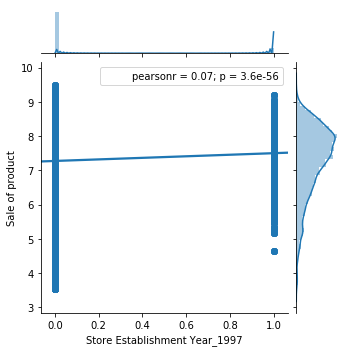

In [57]:
 sns.jointplot(x="Store Establishment Year_1997", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

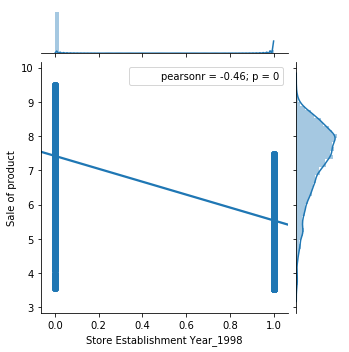

In [58]:
sns.jointplot(x="Store Establishment Year_1998", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

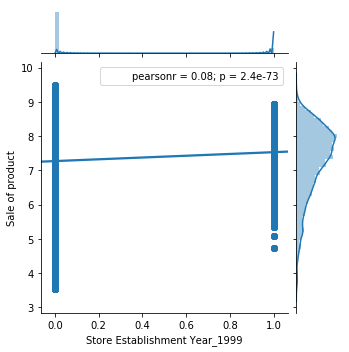

In [59]:
 sns.jointplot(x="Store Establishment Year_1999", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

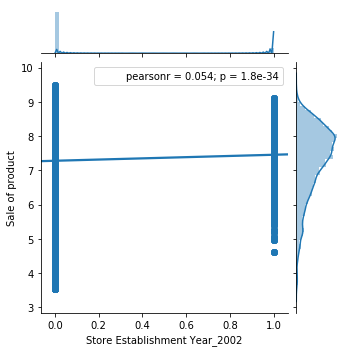

In [60]:
sns.jointplot(x="Store Establishment Year_2002", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

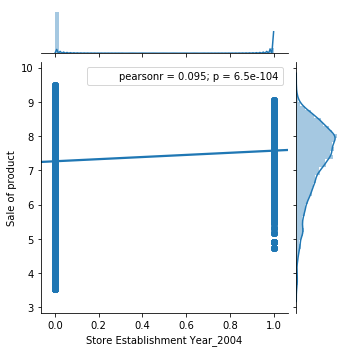

In [61]:
 sns.jointplot(x="Store Establishment Year_2004", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

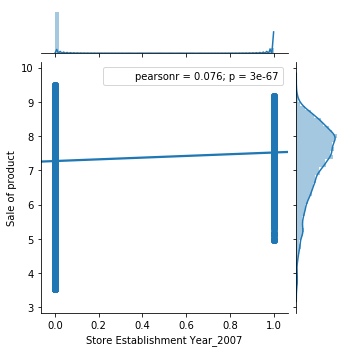

In [62]:
 sns.jointplot(x="Store Establishment Year_2007", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)# Significant

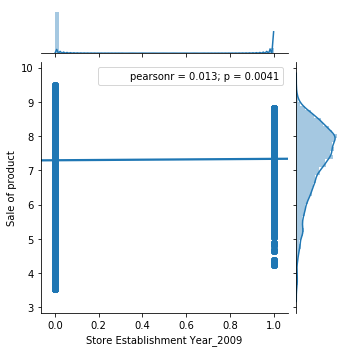

In [63]:
 sns.jointplot(x="Store Establishment Year_2009", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Not Significant

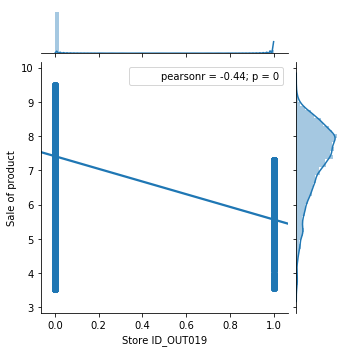

In [64]:
 sns.jointplot(x="Store ID_OUT019", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

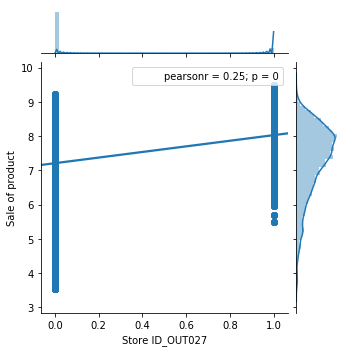

In [65]:
 sns.jointplot(x="Store ID_OUT027", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

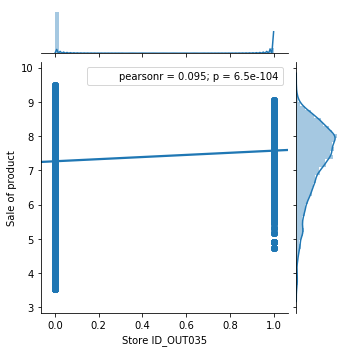

In [66]:
 sns.jointplot(x="Store ID_OUT035", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #significant

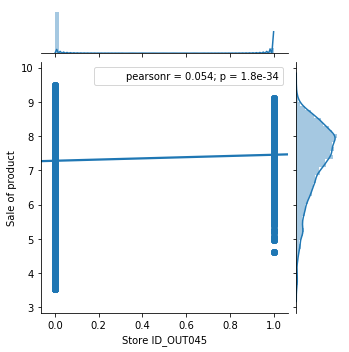

In [67]:
 sns.jointplot(x="Store ID_OUT045", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

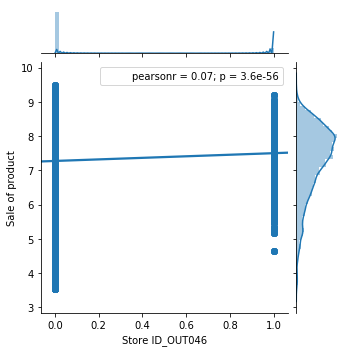

In [68]:
 sns.jointplot(x="Store ID_OUT046", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

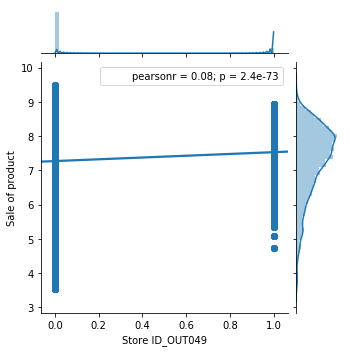

In [69]:
 sns.jointplot(x="Store ID_OUT049", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

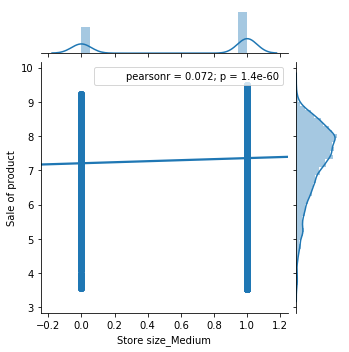

In [70]:
sns.jointplot(x="Store size_Medium", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5) #Significant

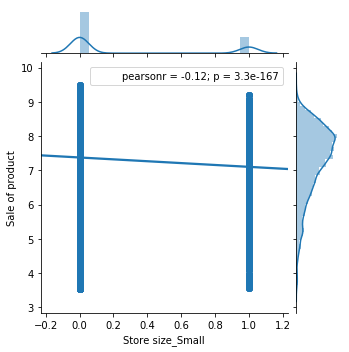

In [71]:
sns.jointplot(x="Store size_Small", y="Sale of product", data=sales_final_df, kind = 'reg', size = 5)#Significant

In [26]:
slstest=sales_final_df

In [27]:

from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
  slstest[["% of space allocation","Price of product"                                                            
,"Store size_Medium"             
,"Store size_Small"              
,"Store Tier Type_Tier 2"        
        
,"Store Establishment Year_1987" 
,"Store Establishment Year_1997" 
,"Store Establishment Year_1998" 
,"Store Establishment Year_1999" 
,"Store Establishment Year_2002" 
,"Store Establishment Year_2004" 
,"Store Establishment Year_2007"  
,"Store Type_Supermarket Type1"    
,"Store Type_Supermarket Type3"                                             
,"Product_Frozen Foods"          
,"Product_Fruits and Vegetables"                         
,"Product_Snack Foods"                     
,"Store ID_OUT013"               
,"Store ID_OUT017"                             
,"Store ID_OUT019"               
,"Store ID_OUT027"               
,"Store ID_OUT035"               
,"Store ID_OUT045"               
,"Store ID_OUT046"               
,"Store ID_OUT049"
]],
  slstest["Sale of product"],
  test_size=0.2,
  random_state = 42 )

In [29]:
X_train['space_price'] = X_train["% of space allocation"] * X_train["Price of product"]
X_test['space_price'] = X_test["% of space allocation"] * X_test["Price of product"]

In [30]:
X_train['Store Size'] = X_train["Store size_Medium"] * X_train["Store size_Small"]
X_test['Store Size'] = X_test["Store size_Medium"] * X_test["Store size_Small"]

In [31]:
#X_train

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linreg = LinearRegression()
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred = linreg.predict( X_test )

In [35]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( y_pred, 2),
                            'residuals': y_test - y_pred } )


In [36]:
test_pred_df[0:10]

,actual,predicted,residuals
7503,1743,1290.51,452.489983
2957,357,705.41,-348.409138
7031,378,728.74,-350.743062
1084,5778,4243.99,1534.005725
856,2357,3411.28,-1054.276327
4304,866,572.75,293.254389
2132,4614,4582.81,31.187476
1385,2411,2017.27,393.726746
5239,1948,1339.07,608.928372
6516,1937,2886.45,-949.447958


In [37]:
from sklearn import metrics

In [38]:
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )

In [39]:
round( rmse, 2 )

1064.75

In [40]:
metrics.r2_score( y_test, y_pred )

0.58288470890181154

In [41]:
import matplotlib.pyplot as plt
import seaborn as sn
get_ipython().magic('matplotlib inline')

In [42]:
residuals = y_test - y_pred

In [43]:
#sn.jointplot(  slstest["Sale of product"], residuals, size = 6 )

In [44]:
#sn.distplot( residuals )

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:

linreg = LinearRegression()


In [47]:
cv_scores = cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )
cv_scores

array([ 0.54258702,  0.5816428 ,  0.57184234,  0.56205443,  0.57720088,
        0.53892677,  0.53858307,  0.59016653,  0.55094337,  0.55089771])

In [48]:
print( "Average r2 score: ", np.round( np.mean( cv_scores ), 2 ) )
print( "Standard deviation in r2 score: ", np.round( np.std( cv_scores ), 2) )

Average r2 score:  0.56
Standard deviation in r2 score:  0.02


In [49]:

from sklearn.feature_selection import SelectKBest, f_regression

In [50]:
model = SelectKBest( score_func=f_regression, k=4 )

In [51]:
results = model.fit( X_train, y_train)

C:\Users\Avariyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Avariyan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Avariyan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Avariyan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [52]:
results.scores_

array([  1.28628506e+02,   3.20107650e+03,   3.56855874e+01,
         6.73300965e+01,   1.90737895e+01,   5.94824213e+00,
         2.05505241e+00,   6.03367677e+02,   8.80346234e+00,
         1.83566036e-01,   1.73242612e+01,   4.10396078e+00,
         7.81393734e+01,   6.95236977e+02,   1.40896543e+00,
         5.67034862e+00,   3.29262498e+00,   5.94824213e+00,
         4.10396078e+00,   5.56690582e+02,   6.95236977e+02,
         1.73242612e+01,   1.83566036e-01,   2.05505241e+00,
         8.80346234e+00,   1.15101836e+02,              nan])

In [53]:
results.pvalues_

array([  1.50301052e-029,   0.00000000e+000,   2.43548851e-009,
         2.72223106e-016,   1.27621386e-005,   1.47573158e-002,
         1.51747903e-001,   9.72245876e-128,   3.01703678e-003,
         6.68339927e-001,   3.19016759e-005,   4.28217569e-002,
         1.20600522e-018,   5.56508299e-146,   2.35269581e-001,
         1.72813241e-002,   6.96356226e-002,   1.47573158e-002,
         4.28217569e-002,   2.21191834e-118,   5.56508299e-146,
         3.19016759e-005,   6.68339927e-001,   1.51747903e-001,
         3.01703678e-003,   1.21890817e-026,               nan])

In [54]:
['%.3f' % p for p in results.pvalues_]

['0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.015',
 '0.152',
 '0.000',
 '0.003',
 '0.668',
 '0.000',
 '0.043',
 '0.000',
 '0.000',
 '0.235',
 '0.017',
 '0.070',
 '0.015',
 '0.043',
 '0.000',
 '0.000',
 '0.000',
 '0.668',
 '0.152',
 '0.003',
 '0.000',
 'nan']

In [55]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Lasso regression

In [56]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.grid_search import GridSearchCV

C:\Users\Avariyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Avariyan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [57]:
lasso_m_ = Lasso()
lasso_params_ = {'alpha':[0.01, 0.1],
               'max_iter':[30000]}

grid_lasso_m = GridSearchCV( lasso_m_,
                          lasso_params_,
                          scoring = "r2" ,
                          cv=5)

In [58]:
grid_lasso_m.fit( X_train, y_train  )

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1], 'max_iter': [30000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [59]:

grid_lasso_m.best_score_

0.5608813657917077

In [60]:
#Decision tree

In [65]:
def model_evaluate( model_ ):
  pred_df = pd.DataFrame( { "actual": y_test, "predicted" : model_.predict( X_test ) } )
  pred_df['resid'] = pred_df.actual - pred_df.predicted
  rmse = np.sqrt( metrics.mean_squared_error( pred_df.actual, pred_df.predicted ) )
  r2 = metrics.r2_score( pred_df.actual, pred_df.predicted )
  print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
  return pred_df, rmse, r2

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:

tree_reg = DecisionTreeRegressor(max_depth = 6)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [69]:
tree_pred, tree_rmse, tree_r2 = model_evaluate( tree_reg )

RMSE:  1055.45427588  :  R Squared:  0.590138170813


In [70]:
#Adaboost Regressor

In [71]:

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [72]:

dtree_reg = DecisionTreeRegressor( max_depth = 8 )

adaboost_m_ = AdaBoostRegressor( dtree_reg, n_estimators = 50 )
adaboost_m_.fit( X_train, y_train )

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [73]:
ada_pre, ada_rmse, ada_r2 = model_evaluate( adaboost_m_ )

RMSE:  1102.74269461  :  R Squared:  0.552588641524


In [74]:
#Gradient Boosting Regressor

In [75]:
gra_boost_m_ = GradientBoostingRegressor( learning_rate = 0.2, n_estimators = 200, max_depth = 5 )

In [76]:
gra_boost_m_.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [77]:
gra_pred, gra_rmse, gra_r2 = model_evaluate( gra_boost_m_ )

RMSE:  1099.67136486  :  R Squared:  0.555077407404
